In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
nifty50 = yf.Ticker("^NSEI")
nifty50 = nifty50.history(period="max")
nifty50 = pd.DataFrame(nifty50, columns=[ 'Close', 'Open'])
X = nifty50.iloc[:, :-1].values
y = nifty50.iloc[:, -1].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Random Forest Regression**

In [23]:
from sklearn.ensemble import RandomForestRegressor
r_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
r_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [24]:
y_pred = r_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

99.95323825381514

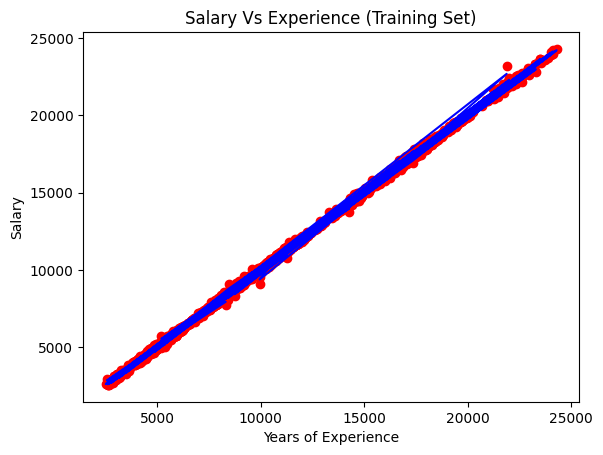

In [25]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, r_regressor.predict(X_train), color = 'blue')
plt.title('Salary Vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [26]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd

In [27]:
# Initialize the Dash app
app = dash.Dash(__name__)

In [28]:
# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),

        html.Div([
            dcc.Input(id='CLOSE', type='number', placeholder='CLOSE',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='OPEN', type='number', placeholder='OPEN',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),

        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

In [29]:
# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('OPEN', 'value'),
     State('CLOSE', 'value')]
)
def update_output(n_clicks,CLOSE,OPEN):
    if n_clicks > 0 and all(v is not None for v in [OPEN,CLOSE]):
        # Prepare the feature vector
        features = pd.DataFrame([[OPEN,CLOSE]],
                                columns=['OPEN', 'CLOSE'])
        # Predict
        prediction = r_regressor.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

In [30]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>